##Universidad Autónoma de Chihuahua
##Facultad de Ingeniería
###Maestría en Computación
###Machine Learning
###Modelos de ensamble
####Dra Olanda Prieto Ordaz
####329675 Maritrini Velázquez Ruiz

###EDA

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [4]:
stroke_df = pd.read_csv('/content/healthcare-dataset-stroke-data.xls')

In [5]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
stroke_df = stroke_df.drop(['id'], axis=1)

In [9]:
stroke_df.gender.value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


<ipython-input-10-1e39fd784357>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=stroke_df, palette='hls')


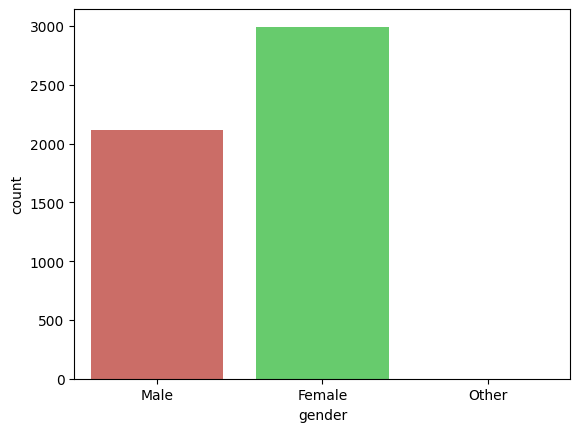

In [10]:
sns.countplot(x='gender', data=stroke_df, palette='hls')
plt.show()

In [11]:
stroke_df.stroke.value_counts()

,count
stroke,
0,4861
1,249


<ipython-input-12-bc0ac6cf8f83>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=stroke_df, palette='hls')


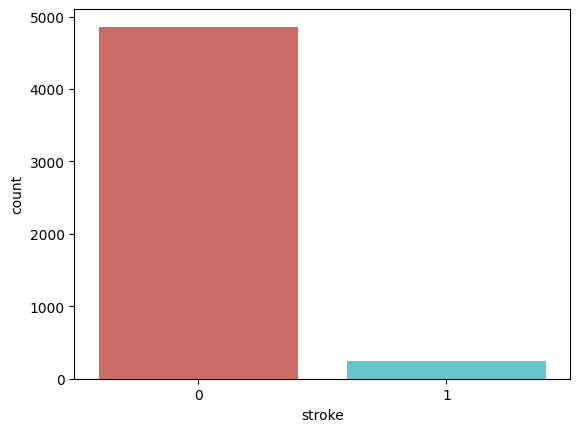

In [12]:
sns.countplot(x='stroke', data=stroke_df, palette='hls')
plt.show()

In [13]:
stroke_df.smoking_status.value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


<ipython-input-14-decf3a307382>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_status', data=stroke_df, palette='hls')


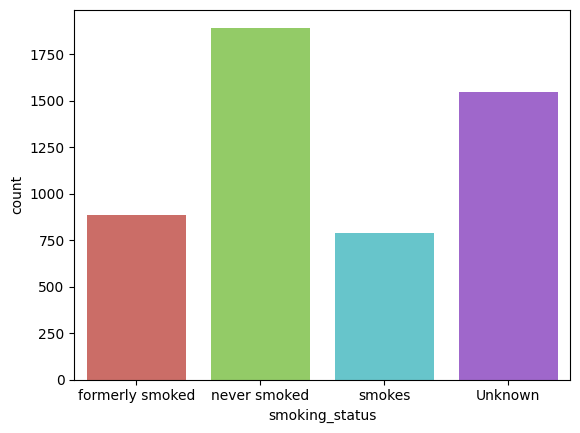

In [14]:
sns.countplot(x='smoking_status', data=stroke_df, palette='hls')
plt.show()

In [15]:
stroke_df.ever_married.value_counts()

,count
ever_married,
Yes,3353
No,1757


<ipython-input-16-c9bbda431033>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ever_married', data=stroke_df, palette='hls')


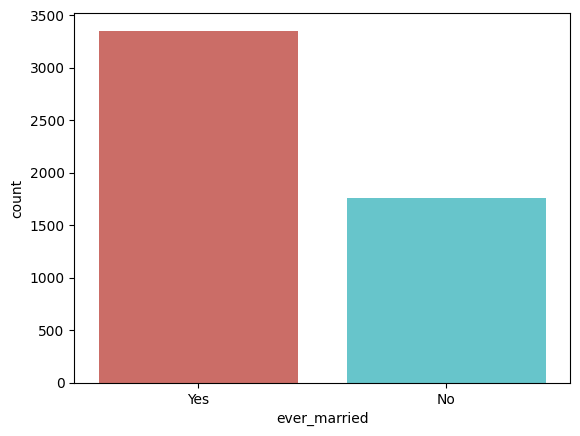

In [16]:
sns.countplot(x='ever_married', data=stroke_df, palette='hls')
plt.show()

In [17]:
stroke_df.work_type.value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


<ipython-input-18-942faef22efb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='work_type', data=stroke_df, palette='hls')


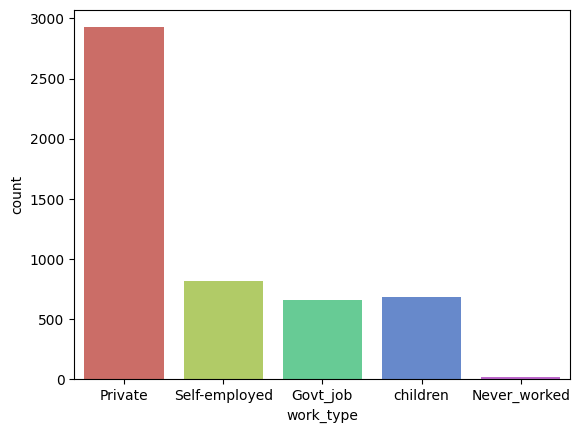

In [18]:
sns.countplot(x='work_type', data=stroke_df, palette='hls')
plt.show()

In [19]:
stroke_df.hypertension.value_counts()

,count
hypertension,
0,4612
1,498


<ipython-input-20-710e6d05bed9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hypertension', data=stroke_df, palette='hls')


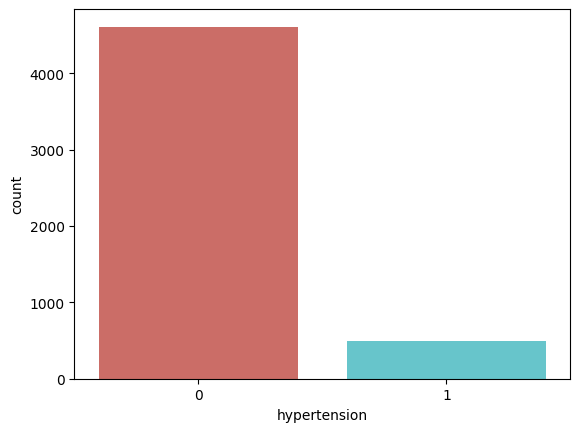

In [20]:
sns.countplot(x='hypertension', data=stroke_df, palette='hls')
plt.show()

In [21]:
stroke_df.heart_disease.value_counts()

,count
heart_disease,
0,4834
1,276


<ipython-input-22-f7c747787eaf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=stroke_df, palette='hls')


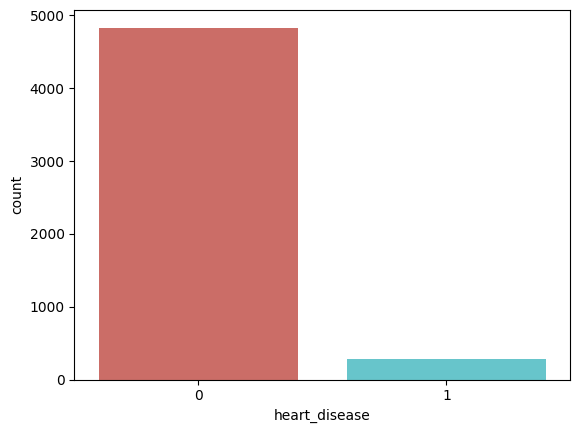

In [22]:
sns.countplot(x='heart_disease', data=stroke_df, palette='hls')
plt.show()

In [23]:
stroke_df.age.value_counts()

,count
age,
78.00,102
57.00,95
52.00,90
54.00,87
51.00,86
...,...
1.40,3
0.48,3
0.16,3


In [24]:
#Rellenar los datos vacios de bmi con el promedio
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') #default 'mean'

In [25]:
columns = ['bmi']
stroke_df[columns] = imputer.fit_transform(stroke_df[columns])

In [26]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [27]:
#cambiar atributos categoricos a numericos
from sklearn.preprocessing import LabelEncoder
labelEn = LabelEncoder()

In [28]:
stroke_df['gender']=labelEn.fit_transform(stroke_df['gender'])
stroke_df['work_type']=labelEn.fit_transform(stroke_df['work_type'])
stroke_df['Residence_type']=labelEn.fit_transform(stroke_df['Residence_type'])
stroke_df['smoking_status']=labelEn.fit_transform(stroke_df['smoking_status'])
stroke_df['ever_married']=labelEn.fit_transform(stroke_df['ever_married'])

In [29]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [30]:
#eliminar datos redundantes
stroke_df[stroke_df.gender.values > 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,2,26.0,0,0,0,2,0,143.33,22.4,1,0


In [31]:
index=stroke_df[stroke_df.gender.values > 1].index
index

Index([3116], dtype='int64')

In [32]:
stroke_df=stroke_df.drop([stroke_df.index[3116]], axis=0)

In [33]:
##correlation matrix
corr_matrix = stroke_df.corr()
corr_matrix["stroke"].sort_values(ascending=False)

,stroke
stroke,1.000000
age,0.245239
heart_disease,0.134905
avg_glucose_level,0.131991
hypertension,0.127891
ever_married,0.108299
bmi,0.038912
smoking_status,0.028108
Residence_type,0.015415
gender,0.009081


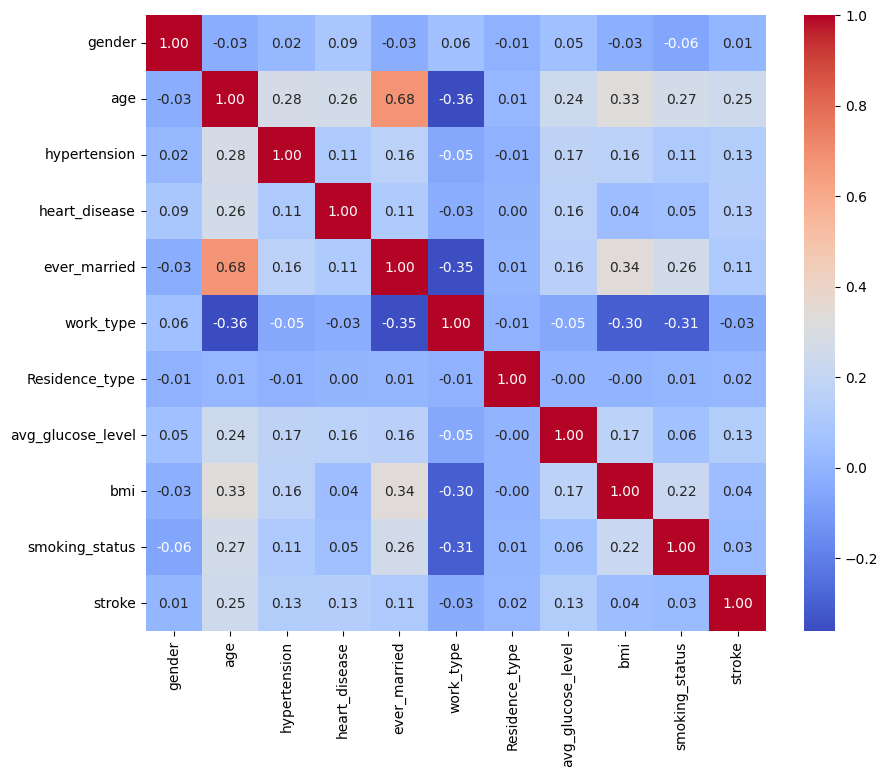

In [34]:
#matriz de correlaciones con el target
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot= True ,fmt=".2f", cmap='coolwarm', cbar=True)

plt.show()

In [35]:
#Division de los datos train, test
X = stroke_df.drop(['stroke'], axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [36]:
##obtener el target (stroke)
y = stroke_df['stroke']
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [37]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [38]:
#balance datos entrenamiento
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

In [39]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
#escalamiento de los datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled_smote = scaler.fit_transform(X_train_smote)

###Implementación de MLP Classifier

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [44]:
mlp = MLPClassifier(max_iter=1000)

In [45]:
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant','adaptive']
}

In [46]:
mlp_best = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5, verbose=2)

In [47]:
mlp_best.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50, 50, 50), (50,), (100,),
                                                (50, 50), (100, 100)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [48]:
print("Best parameters found: ", mlp_best.best_params_)

Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}


In [49]:
y_pred = mlp_best.best_estimator_.predict(X_test_scaled)

In [50]:
accuracy_score(y_test, y_pred)

0.9510763209393346

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


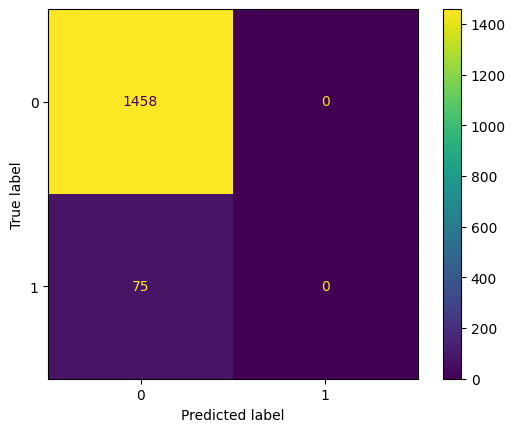

In [52]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=mlp_best.best_estimator_.classes_)
disp.plot()
plt.show()

In [53]:
joblib.dump(mlp_best, 'mlp_best.sav')

['mlp_best.sav']

###Análisis de Resultado y Conclusiones
Se puede observar que el mejor modelo arrojado por la búsqueda en cuadrícula fue una red neuronal perceptron con una capa escondida de 50 neuronas, función de activación relu (La función ReLU simplemente rectifica los datos (z) negativos y los vuelve cero a la salida. Las entradas con valores positivos no sufren modificación alguna a la salida) función de pérdida de gradiente descendente estocástico. Muestra un buen rendimiento con respecto al accuracy, del 95%, pero al revisar la matriz de confusión se puede observar que es pobre en la clasificación de la etiqueta 1 (no stroke), como se ha mostrado en los otros modelos implementados que presentan buen perfomance en accuracy.